In [1]:
import cmasher as cmr
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns
import xgi
from matplotlib.gridspec import GridSpec

import fig_settings as fs
from lcs import *

In [2]:
with open(f"Data/zkc_tmax_comparison.json") as file:
    data = json.load(file)
    tmax = np.array(data["tmax"], dtype=float)
    A = np.array(data["A"], dtype=float)[0, 0, 0]
    Q = np.array(data["Q"], dtype=float)

n_c, n_t, n_r, n, _ = Q.shape

In [3]:
G = nx.Graph(A.astype(int))

cc = clustering_coefficient(A)
deg = degrees(A)

kc = nx.core_number(G)
coreness = np.zeros(n)
coreness[list(kc)] = list(kc.values())

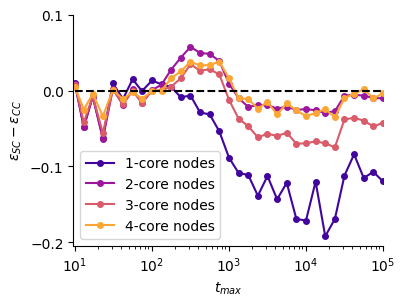

In [4]:
## Coreness difference

ms = 4
alpha = 1
colormap = plt.cm.plasma
cmap = lambda x: colormap(np.interp(x, [coreness.min(), coreness.max()], [0.1, 0.8]))

x = tmax

y1 = np.zeros([n_r, n_t, n])
y2 = np.zeros([n_r, n_t, n])
for i in range(n_r):
    y1[i] = [nodal_performance(Q[0, j, i], A) for j in range(n_t)]
    y2[i] = [nodal_performance(Q[1, j, i], A) for j in range(n_t)]

plt.figure(figsize=(4, 3))

core_values = np.unique(coreness)

for k in core_values:
    n_k = sum(coreness == k)
    y = np.zeros([n_r, n_t, n_k])
    for i in range(n_r):
        y[i] = (y1[i, :, coreness == k] - y2[i, :, coreness == k]).T
    ymean = y.mean(axis=2).mean(axis=0)
    ystd = y.mean(axis=2).std(axis=0)
    plt.semilogx(
        x,
        ymean,
        "o-",
        markersize=ms,
        color=cmap(k),
        alpha=alpha,
        label=f"{int(k)}-core nodes",
    )
    # plt.fill_between(x, ymean - ystd, ymean + ystd, alpha=0.3)
plt.semilogx(tmax, np.zeros_like(tmax), "k--")

plt.xlim([tmax.min() - 0.5, tmax.max() + 1000])
plt.yticks([-0.2, -0.1, 0, 0.1])
plt.legend()
plt.ylabel(r"$\varepsilon_{SC} - \varepsilon_{CC}$")
plt.xlabel(r"$t_{max}$")
sns.despine()

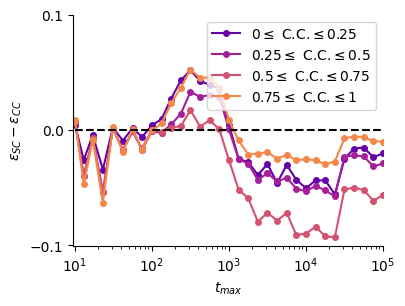

In [5]:
## Clustering coefficient difference
ms = 4
alpha = 1
colormap = plt.cm.plasma
cmap = lambda x: colormap(np.interp(x, [0, 1], [0.1, 0.8]))

x = tmax
y1 = np.zeros([n_r, n_t, n])
y2 = np.zeros([n_r, n_t, n])
for i in range(n_r):
    y1[i] = [nodal_performance(Q[0, j, i], A) for j in range(n_t)]
    y2[i] = [nodal_performance(Q[1, j, i], A) for j in range(n_t)]

cc_bounds = [[0, 0.25], [0.25, 0.5], [0.5, 0.75], [0.75, 1]]

plt.figure(figsize=(4, 3))

for b in cc_bounds:
    n_cc = sum((b[0] <= cc) & (cc <= b[1]))
    y = np.zeros([n_r, n_t, n_cc])
    for i in range(n_r):
        y[i] = (
            y1[i, :, (b[0] <= cc) & (cc <= b[1])]
            - y2[i, :, (b[0] <= cc) & (cc <= b[1])]
        ).T
    ymean = y.mean(axis=2).mean(axis=0)
    ystd = y.mean(axis=2).std(axis=0)
    plt.semilogx(
        x,
        ymean,
        "o-",
        markersize=ms,
        color=cmap((b[0] + b[1]) / 2),
        alpha=alpha,
        label=rf"{b[0]}$\leq$ C.C.$\leq${b[1]}",
    )
plt.semilogx(tmax, np.zeros_like(tmax), "k--")

plt.xlim([tmax.min() - 0.5, tmax.max() + 1000])
plt.yticks([-0.1, 0, 0.1])
plt.legend()
plt.ylabel(r"$\varepsilon_{SC} - \varepsilon_{CC}$")
plt.xlabel(r"$t_{max}$")

sns.despine()

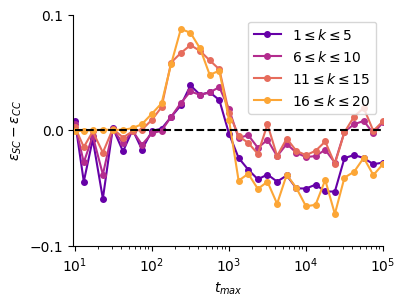

In [6]:
# Degree difference

ms = 4
alpha = 1
colormap = plt.cm.plasma
cmap = lambda x: colormap(np.interp(x, [deg.min(), deg.max()], [0.1, 0.8]))

x = tmax
y1 = np.zeros([n_r, n_t, n])
y2 = np.zeros([n_r, n_t, n])
for i in range(n_r):
    y1[i] = [nodal_performance(Q[0, j, i], A) for j in range(n_t)]
    y2[i] = [nodal_performance(Q[1, j, i], A) for j in range(n_t)]

plt.figure(figsize=(4, 3))

deg_bounds = [[1, 5], [6, 10], [11, 15], [16, 20]]
for d in deg_bounds:
    n_d = sum((d[0] <= deg) & (deg <= d[1]))
    y = np.zeros([n_r, n_t, n_d])
    for i in range(n_r):
        y[i] = (
            y1[i, :, (d[0] <= deg) & (deg <= d[1])]
            - y2[i, :, (d[0] <= deg) & (deg <= d[1])]
        ).T
    ymean = y.mean(axis=2).mean(axis=0)
    ystd = y.mean(axis=2).std(axis=0)
    plt.semilogx(
        x,
        ymean,
        "o-",
        markersize=ms,
        color=cmap((d[0] + d[1]) / 2),
        alpha=alpha,
        label=rf"{int(d[0])}$\leq k\leq${int(d[1])}",
    )
plt.semilogx(tmax, np.zeros_like(tmax), "k--")

plt.xlim([tmax.min() - 0.5, tmax.max() + 1000])
plt.yticks([-0.1, 0, 0.1])
plt.ylabel(r"$\varepsilon_{SC} - \varepsilon_{CC}$")
plt.xlabel(r"$t_{max}$")
plt.legend()
sns.despine()

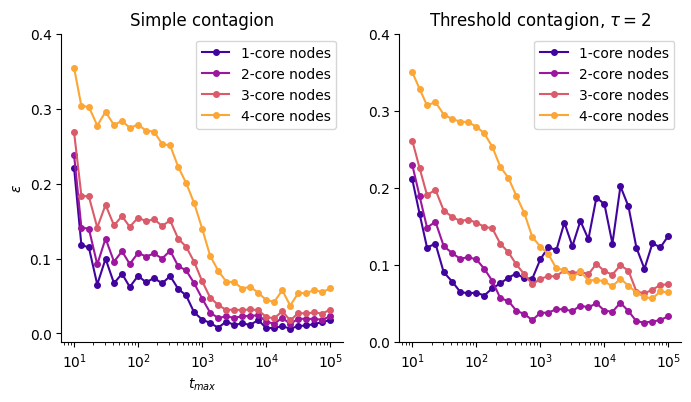

In [7]:
## Coreness

ms = 4
alpha = 1
colormap = plt.cm.plasma
cmap = lambda x: colormap(np.interp(x, [coreness.min(), coreness.max()], [0.1, 0.8]))

x = tmax
y1 = np.zeros([n_r, n_t, n])
y2 = np.zeros([n_r, n_t, n])
for i in range(n_r):
    y1[i] = [nodal_performance(Q[0, j, i], A) for j in range(n_t)]
    y2[i] = [nodal_performance(Q[1, j, i], A) for j in range(n_t)]

plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.title("Simple contagion")
for k in np.unique(coreness):
    n_k = sum(coreness == k)
    y = np.zeros([n_r, n_t, n_k])
    for i in range(n_r):
        y[i] = y1[i, :, coreness == k].T
    ymean = y.mean(axis=2).mean(axis=0)
    ystd = y.mean(axis=2).std(axis=0)
    plt.semilogx(
        x,
        ymean,
        "o-",
        markersize=ms,
        color=cmap(k),
        alpha=alpha,
        label=f"{int(k)}-core nodes",
    )
plt.legend()
plt.yticks([0, 0.1, 0.2, 0.3, 0.4])
plt.ylabel(r"$\varepsilon$")
plt.xlabel(r"$t_{max}$")

plt.subplot(122)
plt.title(r"Threshold contagion, $\tau=2$")
for k in np.unique(coreness):
    n_k = sum(coreness == k)
    y = np.zeros([n_r, n_t, n_k])
    for i in range(n_r):
        y[i] = y2[i, :, coreness == k].T
    ymean = y.mean(axis=2).mean(axis=0)
    ystd = y.mean(axis=2).std(axis=0)
    plt.semilogx(
        x,
        ymean,
        "o-",
        markersize=ms,
        color=cmap(k),
        alpha=alpha,
        label=f"{int(k)}-core nodes",
    )

plt.yticks([0, 0.1, 0.2, 0.3, 0.4])

plt.legend()
sns.despine()

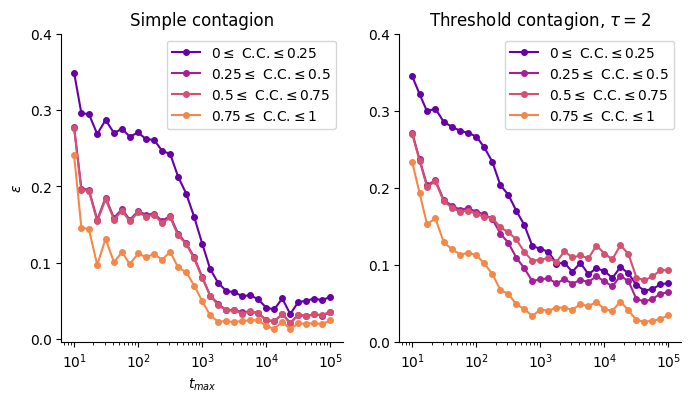

In [8]:
## Clustering coefficient

ms = 4
alpha = 1
colormap = plt.cm.plasma
cmap = lambda x: colormap(np.interp(x, [0, 1], [0.1, 0.8]))

x = tmax
y1 = np.zeros([n_r, n_t, n])
y2 = np.zeros([n_r, n_t, n])
for i in range(n_r):
    y1[i] = [nodal_performance(Q[0, j, i], A) for j in range(n_t)]
    y2[i] = [nodal_performance(Q[1, j, i], A) for j in range(n_t)]

cc_bounds = [[0, 0.25], [0.25, 0.5], [0.5, 0.75], [0.75, 1]]

plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.title("Simple contagion")
for b in cc_bounds:
    n_cc = sum((b[0] <= cc) & (cc <= b[1]))
    y = np.zeros([n_r, n_t, n_cc])
    for i in range(n_r):
        y[i] = y1[i, :, (b[0] <= cc) & (cc <= b[1])].T
    ymean = y.mean(axis=2).mean(axis=0)
    ystd = y.mean(axis=2).std(axis=0)
    plt.semilogx(
        x,
        ymean,
        "o-",
        markersize=ms,
        color=cmap((b[0] + b[1]) / 2),
        alpha=alpha,
        label=rf"{b[0]}$\leq$ C.C.$\leq${b[1]}",
    )
plt.legend()
plt.yticks([0, 0.1, 0.2, 0.3, 0.4])
plt.ylabel(r"$\varepsilon$")
plt.xlabel(r"$t_{max}$")

plt.subplot(122)
plt.title(r"Threshold contagion, $\tau=2$")
for b in cc_bounds:
    n_cc = sum((b[0] <= cc) & (cc <= b[1]))
    y = np.zeros([n_r, n_t, n_cc])
    for i in range(n_r):
        y[i] = y2[i, :, (b[0] <= cc) & (cc <= b[1])].T
    ymean = y.mean(axis=2).mean(axis=0)
    ystd = y.mean(axis=2).std(axis=0)
    plt.semilogx(
        x,
        ymean,
        "o-",
        markersize=ms,
        color=cmap((b[0] + b[1]) / 2),
        alpha=alpha,
        label=rf"{b[0]}$\leq$ C.C.$\leq${b[1]}",
    )

plt.yticks([0, 0.1, 0.2, 0.3, 0.4])
plt.legend()
sns.despine()

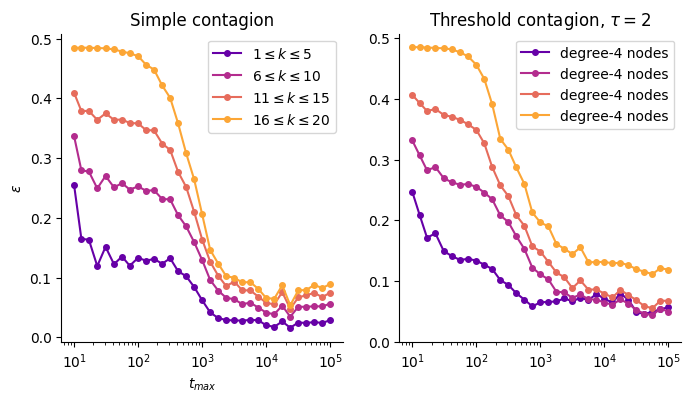

In [9]:
# Degree

ms = 4
alpha = 1
colormap = plt.cm.plasma
cmap = lambda x: colormap(np.interp(x, [deg.min(), deg.max()], [0.1, 0.8]))

x = tmax
y1 = np.zeros([n_r, n_t, n])
y2 = np.zeros([n_r, n_t, n])
for i in range(n_r):
    y1[i] = [nodal_performance(Q[0, j, i], A) for j in range(n_t)]
    y2[i] = [nodal_performance(Q[1, j, i], A) for j in range(n_t)]

plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.title("Simple contagion")

deg_bounds = [[1, 5], [6, 10], [11, 15], [16, 20]]

for d in deg_bounds:
    n_d = sum((d[0] <= deg) & (deg <= d[1]))
    y = np.zeros([n_r, n_t, n_d])
    for i in range(n_r):
        y[i] = y1[i, :, (d[0] <= deg) & (deg <= d[1])].T
    ymean = y.mean(axis=2).mean(axis=0)
    ystd = y.mean(axis=2).std(axis=0)
    plt.semilogx(
        x,
        ymean,
        "o-",
        markersize=ms,
        color=cmap((d[0] + d[1]) / 2),
        alpha=alpha,
        label=rf"{int(d[0])}$\leq k\leq${int(d[1])}",
    )
plt.legend()
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
plt.xlabel(r"$t_{max}$")
plt.ylabel(r"$\varepsilon$")

plt.subplot(122)
plt.title(r"Threshold contagion, $\tau=2$")


for d in deg_bounds:
    n_d = sum((d[0] <= deg) & (deg <= d[1]))
    y = np.zeros([n_r, n_t, n_d])
    for i in range(n_r):
        y[i] = y2[i, :, (d[0] <= deg) & (deg <= d[1])].T
    ymean = y.mean(axis=2).mean(axis=0)
    ystd = y.mean(axis=2).std(axis=0)
    plt.semilogx(
        x,
        ymean,
        "o-",
        markersize=ms,
        color=cmap((d[0] + d[1]) / 2),
        alpha=alpha,
        label=f"degree-{int(k)} nodes",
    )
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
plt.legend()
sns.despine()